# ECE 5470 Lab 1 Report


## by Junjie Tian


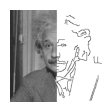

Lab 1 first image display: ein.vx
<scaled size: (256 x 256) >


In [1]:
import numpy as np
from v4 import vx
from v4 import vd

vd.dispmvx("ein.vx", size=0.3, capt="Lab 1 first image display: ein.vx")


In [3]:
# Run this cell to get simple help information on vd.dispmvx()
help (vd.dispmvx)

Help on function dispmvx in module v4.vd:

dispmvx(*argv, **kwargs)
    Display multiple VisionX or other images (scaled)
    [capt = ]
    [scale =]
    [size=]
    [fixed=True]
    [values=True]
    [file= fname]
    [grid=(rows, cols)]



### A. General Image Manipulation
1.	What are the pixel coordinates of Albert’s right eye?  

If we draw a rectangular bounding box around the eye, the coordinates of the upper-left, upper-right, bottom-left, bottom-right corners of the box are: 
(97.79, 97.86), (113.92, 97.86), (97.79, 107.75), (113.92, 107.75)

2.	How did you make this measurement?  

A. I zoomed the image to 20 times and used buttons of the mouse to center the right eye in the field of view.
B. I used the "Rect." tool to mark an ROI by including all parts of the right eye in the box.
C. I moved the mouse to the four corners of the rectangular box and read the pixel coordinates 

3.	What is the width of Albert’s mustache?   

47.72 mm.

4.	What are the main issues in making distance measurements on images? Consider and comment on the following: (a) Mouse Control, (b) Feature visibility, (c) Image Size, (e) Question ambiguity.  

(a) The mouse cursor moved very fast on the screen as I moved the mouse, so it was very hard to click on the starting or ending points that I wished to click. I resolved this issue by reducing the sensitivity of the mouse in the setting of my laptop.
(b) As the image is not clear, it was hard to distinguish the boundary between the mounth and the mustache. Besides, the right side of the face was in contours, which made the identification of the boundary more difficult.
(c) The shape of the mustache is irregular, so it is unclear whether we should measure the longest width, the shortest width, the diagonal line, or take an average value.
(e) Firstly, the meaning of the "width" is very objective. I'm not sure whether to measure the horizontal length or the vertical length of the mustache. I think people usually use the word 'thickness' to describe the vertical length, so I measure the horizontal length as the width. Secondly, the shape of the mustache is irregular, and the question doesn't specify how do we measure the length (possible interpretation: measure the longest value, shortest value, diagonal line, average value...)



### B. Grey Level Image manipulation

1.	Window=2 Level=128. what type of image do you observe? what is a useful purpose for this setting?

With a windowing with very narrow range of pixel intensities around the midpoint (128), the image shows either very dark or very bright pixels. Only the face, the hair, and small portion of the body are in white color; the majority parts are in black color.
There is a very strong contrast between neighboring pixels, and there is a very strong granularity in the image.
This setting is useful if we want to identify a specific part of the face, such as her eyes, nose, and ears. It is also useful in edge detection, such as detecting the contour of the face.

2.	Window=512 Level=128. what is the range of displayed image pixel values with this setting?

The range is (-128, 384). 
Calculation:
512/2 = 256 (the maximum distance to the left and right of the middle point in the axis)
128 + 256 = 384
128 - 256 = -128

3.	Window=512, Level=0. what is the range of displayed image pixel values with this setting? 

The range is (-256, 256). 
Calculation:
512/2 = 256 (the maximum distance to the left and right of the middle point in the axis)
0 + 256 = 256
0 - 256 = -256


### C. Image File Inspection
1.	What is the size (dimensions) of the image in the file girl-grey.vx? How did you find this?

The size of the image is 256x256. I found the answer by typing the command "vqfile -q -s girl-grey.vx" in the terminal. The answer is in the second line of the output:
Size:       256 x 256

2.  What is the type of the pixels of the image in the file girl-grey.vx? How did you find this?

The type of the pixels is byte. I found the answer by typing the command "vqfile -q -s girl-grey.vx" in the terminal. The answer is in the third line of the output:
Pixel Type: byte

3. On what date was the file girl-grey.vx created? How did you find this?

The image was created on August 12th, 2022. I found the answer by typing the command "vls -l girl-grey.vx" in the terminal. The output showed when the image was created:
created on : Fri Aug 12 00:48:46 2022

4. What is the mean pixel value in the iamge in girl-grey.vx? How did you find this?

The mean pixel value is 73.565.  I found the answer by typing the command "vps girl-grey.vx" in the terminal.

5. Comment/explain anything unusual that you observe in the histogram.

The grayscale histogram of the picture shows a left-skewed bimodal distribution. There are two peaks: the higher peak is around 50, and the lower peak is around 100.

The grayscale values of the two peaks are closer to 0 than to 255, which suggests that the image is underexposed and dark. The possible reason is that the light intensity is manipulated intentionally, as suggested by "grey" in the name of the image. Besides, the range of the distribution of grayscale values is narrow, so the contrast of the image is low. The reason for this is similar to the reason of the previous observation.


Commands that I executed in the Terminal:

vls -l girl-grey.vx

vps girl-grey.vx

vqfile -q -s girl-grey.vx

vpr girl-grey.vx

vplot -h -rpng girl-grey.vx of=girl-grey.png

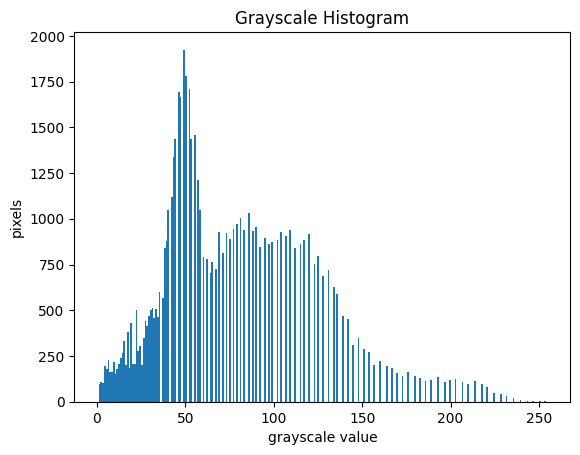

Histogram of girl-grey.vx


In [4]:
# Examples of using the python utilites
# 1. Run this cell to import the image and then
# display the histogram usign the vd.dhist function
img=vx.Vx('girl-grey.vx')
vd.dhist(img, capt='Histogram of girl-grey.vx')

Comment on anything unusual you observe in the histogram. Can you suggest why it has this appearance

The answer is written under the question 5 above.

In [5]:
# 2. Run this cell to show the pixed descriptive statistics for an image
## note on new system this has errors in the second column.
ret = vx.vxstats(img, show=True)

Statistic  Value    (Omitting zero)
number:    65536    (   65536)
mean  :   73.565   (  73.565)
median:     62.0    (    62.0)
min   :        1    (    62.0)
max   :      254    (    62.0)
stdev : 42.62076    (42.62076)


vxinfo:
{'shape': (256, 256), 'dtype': dtype('uint8'), 'color': False}
vxstats:
{'number': 65536, 'mean': 174.9594, 'median': 155.0, 'min': 0, 'max': 255, 'stdev': 81.0213, 'numn0': 63980, 'mean0': 179.21443, 'median0': 161.0, 'min0': 32.0, 'max0': 255.0, 'stdev0': 77.21099}
dhist:


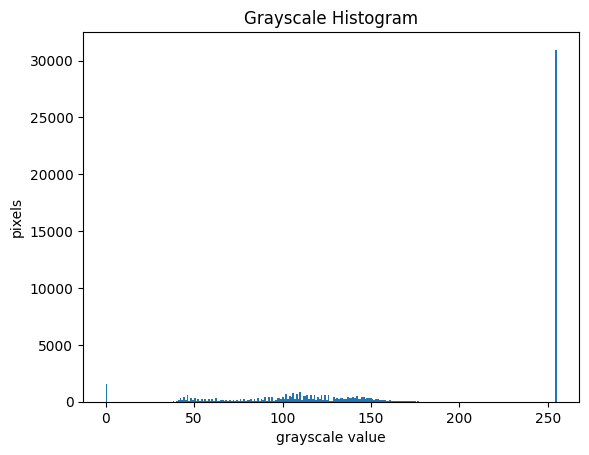

None


In [6]:
# 6. Python image information
# In this cell use the python utility commands (vx.vxinfo,vx.vxstats and vd.dhist) to present the information
# and histogram of ein.vx image. Note, you do not have to read the image explicity into the notebook

ein_img = vx.Vx('ein.vx')
print("vxinfo:")
print(vx.vxinfo(ein_img))

print("vxstats:")
print(vx.vxstats(ein_img))

print("dhist:")
print(vd.dhist(ein_img))


7. Comment/explain anything unusual that you observe in the histogram of ein.vx

The grayscale histogram of the picture is consisted of three parts: a very high peak at grayscale value of 255, a low peak at grayscale value of 0, and an area of bimodal distribution between grayscale value of about 50 to 150. There is a very high peak at 255 because almost all pixels on the right-half of the image are in white. There is a low peak at grayscale value of 0 because the contour of the person is drawn in black ink on the right-hand side. The bimodal distribution corresponds to the left-hand side of the image.

The unusual distribution in the histogram is mainly caused by the right-half of the picture. There are only black and white colors on the right side to show the contour, so there are two peaks in the histogram.

### D. Image Set Display, Pixel Quantization


1.	What does the girl image sequence show?

It shows that as the values of 'grey' and 'bpp' decrease, the image will become blurry and loses many detail information. The reason is that the darker pixels (in grey color) will gradually become black and the brighter pixels will gradually become white as those two parameters decrease.

2.  What do the image parameters printed in the caption of the image mean?

grey: the color depth of the image. It represents how many distinct shades of gray a pixel can display.
bpp: bits per pixel. The maximum number of gray shades that a pixel can represent is equal to 2^(bpp).

3.	At what quantization does degradation in image quality become noticeable?

Quantization can be noticed when we turn the 6th image to the 7th image.

4.	What is the implication of this observation for image display design? Comment on the number of gray levels you would include in a product for general use and why?

It implies that as the 'grey' and 'bpp' decreases, less number of distinct gray shades can be represented and the quality of the image will be worse.

I will choose the gray level of 32. The first reason is that the picture becomes blurry noticeably when the gray level reduces from 32 to 21, so 32 is a minimum requirement. The second reason is that a smaller number of gray levels will reduce the memory occupied by the photo in electronic devices. Therefore, we choose the smallest number of gray levels while not reducing the quality too much.

5.	Many home theater systems claim to have a 4000 to 1 contrast ratio or (much) greater. Assuming that this is possible by the image encoding methods used, how is such a large range useful given human visual system limitations?

The large range is not very useful considering the limitations of human visual system. Based on the analysis in the previous parts, a noticeable difference in image could be detected by human eye when we change the gray levels from 32 to 21, which means that our eyes can distinguish 32 different brightness levels. I do not notice significant difference when the grey level decreases from 256 to 32. Thus, even though the home theater system can show 4000 different levels of brightness, it is very hard for our eyes to distinguish the difference.

### E. Terminal command and log enhancement
1.	What does the vmath command do?

The vmath command is used to perform mathematical calculations on each pixel of an image. For instance, in the command "vmath -mlog -scale girl-grey.vx of=girl-log.vx", the natural log of the grayscale value of each pixel is calculated. The original picture is "girl-grey.vx", and the image after the log operation is "girl-log.vx"

2.	How does the vmath operation affect the visibility of image features?
Are some parts of the image easier to see after the log transform?
Is it possible to see more or less detail after the transform?

The image is brighter than before.
Yes. The leaf above the flower and the pupils of the girl are easier to see after the log transformation.
Generally speaking, less details are shown after the transform. However, the answer to this question depends on which parts of the body we are discussing about. While for most parts of the body, less details are shown, more details can be seen for certain parts of the body.

3.	If more detail is visible, how is this possible? (consider your answer to question 2) (think carefully)

As taking the log with base of 10(natural log) and with base of 2 for all images will show proportional results, and most numbers we are using in this question are powers of 2, I will use taking log with base of 2 in this answer for convenience.

After we take the log operation, the small difference in the small grayscale values are intensified. For example, if a gray-dark pixel has grayscale value of 32, and a even-darker pixel has grayscale value of 4. Before taking the log, the difference between them is (32-4)/256 = 10.9% of the whole scale; after taking the log, 32 becomes 5 and 4 becomes 2. If we map 2 and 5 back to the scale of 0 to 255, the difference is (5-2)/8 = 37.5% of the whole scale. Therefore, the bigger difference will make it easier for human eye to detect.


### F. Large Image Display

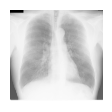

xray.vs logo
<scaled size: (2048 x 2048) >


In [7]:
xray=vx.Vx('xray.vs')
vd.dispmvx(xray, capt='xray.vs logo', size=0.3)



1.	What is the size of the x-ray image?

The size is (2048 x 2048).

2.	What are the window settings?

Window: 2000, Level: 3000.

3.	Which interpolation method is the best and why?

The bicubic interpolation method is the best one. 

It considers the average of 4*4=16 neighboring pixels, which is more than the 2*2=4 neighboring pixels for the bilinear interpolation. Therefore, smoother curves can be shown and the resulting image will be more visually appealing.

Besides, the calculation involved in the bicubic interpolation is easier than that of spline interpolation. There are polynomial functions involved in spline interpolation, but we don't need them in bicubic interpolation.


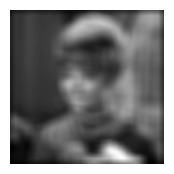

girl-seq.vx image 3
<scaled size: (256 x 256) >


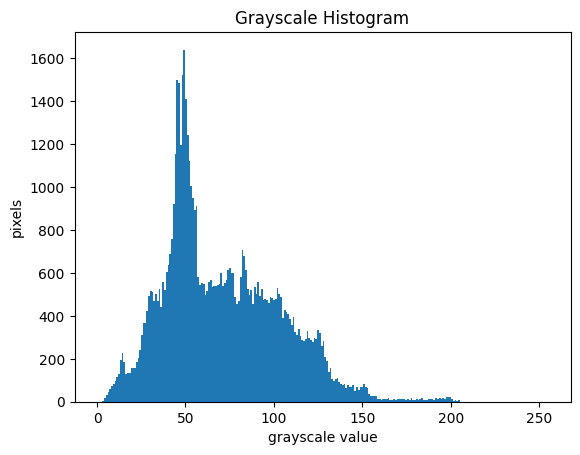

Histogram of girl-seq.vx image 3


In [8]:
# Exampe display of image sequence image and histogram
grls=vx.Vx('girl-seq.vx')
vd.dispmvx(grls.i[5], capt='girl-seq.vx image 3', size=0.5 )
vd.dhist(grls.i[5], capt='Histogram of girl-seq.vx image 3' )

4. How do you think the images in girl-seq.vx were created?

The images were created by taking a interpolation method. The method is possibly bilinear interpolation. The reason is that from the first to the last picture, the distribution of the grayscale value changes from discrete to continuous. There are less small and large grayscale value as we are taking average of grayscale values of neighboring pixels to form new grayscale values.

5. How do you explain the differences between the histograms of girl-grey.vx and girl-seq.vx image 3 ?

As stated above, it is possible that the girl-grey image is taken three rounds of interpolation which involves taking average to obtain the girl-seq.vx image 3. Thus, the grayscale values are 'averaged out' so that the distribution curve becomes more continuous, and there are less extremely large or small values.


### G. Segmentation Using Thresholding


1.	What is the best threshold for the facsimile image?

The best threshold is 224.

2.	What is your criterion for best threshold?

I am focusing on the small characters in the upper part of the image. When the grayscale value is 224 or a litte bit below 224 (around 220), I can clearly see those letters as appropriate amount of dark ink is shown. If the level is above 224, it will be hard to identify all letters easily.

3.	What is the best threshold for the map image?

The best threshold is 85.

4.	What is your criterion for best threshold?

If the level value is above 85, some portions at the corners of the map will become completely dark such that people cannot read all information in the map clearly. Besides, when the level value is set to about 80, the gridlines can be shown clearly. Thus, 85 is the threshold value I choose.

5.	What is the problem in thresholding the map image?

If I set the level value to be 85, the whole map is shown but some letters in the right-hand side of the map cannot be seen clearly. However, if I set the level value to be 100 or 120, the letters can be clearly seen but some areas in the upper-left and lower-left corners are in black.

6.	How might you get a better result on the map image? (That is, what kind of processing operations might improve the result?)

I can set both the window value and the level value to be larger, so that a greater range of grayscale values are accepted. The letters could be seen clearly while most parts of the map can be seen. For instance, I can set the window = 40 and level = 100.


### H.   Edge Detection
<img src="caboose.png" width="100px" >

1.	Are all the edges detected by vedge?

No. Some edges are not detected, such as the wheel chains of the train.

2.	Can you improve the result? (by using different options)

Yes. I can use the 'vedgedir' operation in the VisionX v4 system.

3.	What is an edge? (a) provide a definition for an edge:

The edge is a boundary between different parts of an object or the outermost countour of the object. In a picture, the grayscale value of pixels on two sides of an edge usually differ a lot, while the grayscale value of pixels within an edge are similar.

4.	Describe what you mean by edges in the context of the caboose image.

The edges can separate the caboose from the background, and these edges is the outermost contour of the caboose. The edges can also separate different parts of the caboose and help people see the general curve and shape of the caboose; for example, the edges of the windows and wheels help us to identify the caboose more accurately.

5. In a code cell use the a python utility program to display the caboose input image and the edge image result side by side.


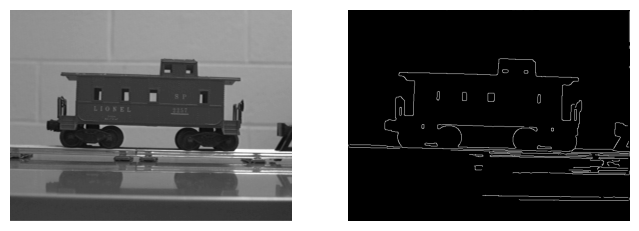

caboose input image and the edge image result
<scaled size: (480 x 640) (480 x 640) >


In [9]:
in_im = vx.Vx('caboose.vx')
ed_im = vx.Vx('ecaboose.vx')
vd.dispmvx(in_im, ed_im, capt="caboose input image and the edge image result")